In [1]:

# -*- coding: utf-8 -*-
"""
Created on Tue Sep  1 09:54:18 2015

@author: jrose01
"""

import numpy
import pandas
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 

'\nCreated on Tue Sep  1 09:54:18 2015\n\n@author: jrose01\n'

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

In [4]:

data = pandas.read_csv('../../data/csv/nesarc_pds.csv', low_memory=False)

In [9]:

############################################################################
#DATA MANAGEMENT
############################################################################

#setting variables you will be working with to numeric
data['IDNUM'] =pandas.to_numeric(data['IDNUM'], errors='coerce')
data['TAB12MDX'] = pandas.to_numeric(data['TAB12MDX'], errors='coerce')
data['MAJORDEPLIFE'] = pandas.to_numeric(data['MAJORDEPLIFE'], errors='coerce')
#data['NDSymptoms'] = pandas.to_numeric(data['NDSymptoms'], errors='coerce')
data['SOCPDLIFE'] = pandas.to_numeric(data['SOCPDLIFE'], errors='coerce')
data['S3AQ3C1'] = pandas.to_numeric(data['S3AQ3C1'], errors='coerce')
data['AGE'] =pandas.to_numeric(data['AGE'], errors='coerce')
data['SEX'] = pandas.to_numeric(data['SEX'], errors='coerce')

In [10]:

data['S3AQ3B1'] = pandas.to_numeric(data['S3AQ3B1'], errors='coerce')
data['CHECK321'] =pandas.to_numeric( data['CHECK321'], errors='coerce')
data['S3AQ8B11'] = pandas.to_numeric(data['S3AQ8B11'], errors='coerce')
data['S3AQ8B12'] = pandas.to_numeric(data['S3AQ8B12'], errors='coerce')
data['S3AQ8B13'] = pandas.to_numeric(data['S3AQ8B13'], errors='coerce')
data['S3AQ8B7A'] = pandas.to_numeric(data['S3AQ8B7A'], errors='coerce')
data['S3AQ8B7B'] = pandas.to_numeric(data['S3AQ8B7B'], errors='coerce')
data['S3AQ8B7C'] = pandas.to_numeric(data['S3AQ8B7C'], errors='coerce')
data['S3AQ8B7D'] = pandas.to_numeric(data['S3AQ8B7D'], errors='coerce')
data['S3AQ8B7E'] = pandas.to_numeric(data['S3AQ8B7E'], errors='coerce')
data['S3AQ8B7F'] = pandas.to_numeric(data['S3AQ8B7F'], errors='coerce')
data['S3AQ8B7G'] = pandas.to_numeric(data['S3AQ8B7G'], errors='coerce')
data['S3AQ8B7H'] = pandas.to_numeric(data['S3AQ8B7H'], errors='coerce')
data['S3AQ8B7J'] = pandas.to_numeric(data['S3AQ8B7J'], errors='coerce')

In [11]:

data['S6Q1'] = pandas.to_numeric(data['S6Q1'], errors='coerce')
data['S6Q2'] = pandas.to_numeric(data['S6Q2'], errors='coerce')
data['S6Q3'] = pandas.to_numeric(data['S6Q3'], errors='coerce')
data['S6Q7'] = pandas.to_numeric(data['S6Q7'], errors='coerce')
data['S6Q61'] = pandas.to_numeric(data['S6Q61'], errors='coerce')
data['S6Q62'] = pandas.to_numeric(data['S6Q62'], errors='coerce')
data['S6Q63'] = pandas.to_numeric(data['S6Q63'], errors='coerce')
data['S6Q64'] = pandas.to_numeric(data['S6Q64'], errors='coerce')
data['S6Q65'] = pandas.to_numeric(data['S6Q65'], errors='coerce')
data['S6Q66'] = pandas.to_numeric(data['S6Q66'], errors='coerce')
data['S6Q67'] = pandas.to_numeric(data['S6Q67'], errors='coerce')
data['S6Q68'] = pandas.to_numeric(data['S6Q68'], errors='coerce')
data['S6Q69'] = pandas.to_numeric(data['S6Q69'], errors='coerce')
data['S6Q610'] = pandas.to_numeric(data['S6Q610'], errors='coerce')
data['S6Q611'] = pandas.to_numeric(data['S6Q611'], errors='coerce')
data['S6Q612'] = pandas.to_numeric(data['S6Q612'], errors='coerce')
data['S6Q613'] = pandas.to_numeric(data['S6Q613'], errors='coerce')

In [12]:

data['S3AQ3C1']=data['S3AQ3C1'].replace(99, numpy.nan)

In [17]:

# run this code to do the NDsymptoms regression
# pandas gives observations missing on all symptoms (N=3) a value of zero, but should be nan
# have to delete them 
regression_df = data[(data['AGE']<=25) & (data['CHECK321']==1) & (data['S3AQ3B1']==1) &
                     (data['IDNUM']!=20346) & (data['IDNUM']!=36471) & (data['IDNUM']!=28724)].copy()

In [18]:

# run this code to do all other regression analyses
other_df = data[(data['AGE']<=25) & (data['CHECK321']==1) & (data['S3AQ3B1']==1)].copy()

In [16]:

# Current Tolerance criteria #1 DSM-IV
def crit1 (row):
   if row['S3AQ8B11']==1 or row['S3AQ8B12'] == 1 :
      return 1
   elif row['S3AQ8B11']==2 and row['S3AQ8B12']==2 :
      return 0
sub1['crit1'] = sub1.apply (lambda row: crit1 (row),axis=1)
chk2 = sub1['crit1'].value_counts(sort=False, dropna=False)
print (chk2)
chk3 = sub1['S3AQ8B11'].value_counts(sort=False, dropna=False)
print (chk3)
chk4 = sub1['S3AQ8B12'].value_counts(sort=False, dropna=False)
print (chk4)
print (pandas.crosstab(sub1['S3AQ8B11'], sub1['S3AQ8B12']))

0.00    968
1.00    338
nan      11
Name: crit1, dtype: int64
2.00    1098
1.00     209
9.00      10
Name: S3AQ8B11, dtype: int64
2.00    1101
1.00     207
9.00       9
Name: S3AQ8B12, dtype: int64
S3AQ8B12  1.00  2.00  9.00
S3AQ8B11                  
1.00        78   130     1
2.00       128   968     2
9.00         1     3     6


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:

c1 = sub1['S3AQ8B7J'].value_counts(sort=False, dropna=False)
print (c1)

nan     806
1.00    264
2.00    243
9.00      4
Name: S3AQ8B7J, dtype: int64


In [20]:

#Current 8 WITHDRAWAL SUB-SYMPTOMS IN DSM-IV (recode 1,2 to 0,1 for summing)
# after recoding 9s to missing
recode1 = {1: 1, 2: 0}
sub1['S3AQ8B7A']=sub1['S3AQ8B7A'].replace(9, numpy.nan)
sub1['S3AQ8B7A']= sub1['S3AQ8B7A'].map(recode1)
sub1['S3AQ8B7B']=sub1['S3AQ8B7B'].replace(9, numpy.nan)
sub1['S3AQ8B7B']= sub1['S3AQ8B7B'].map(recode1)
sub1['S3AQ8B7C']=sub1['S3AQ8B7C'].replace(9, numpy.nan)
sub1['S3AQ8B7C']= sub1['S3AQ8B7C'].map(recode1)
sub1['S3AQ8B7D']=sub1['S3AQ8B7D'].replace(9, numpy.nan)
sub1['S3AQ8B7D']= sub1['S3AQ8B7D'].map(recode1)
sub1['S3AQ8B7E']=sub1['S3AQ8B7E'].replace(9, numpy.nan)
sub1['S3AQ8B7E']= sub1['S3AQ8B7E'].map(recode1)
sub1['S3AQ8B7F']=sub1['S3AQ8B7F'].replace(9, numpy.nan)
sub1['S3AQ8B7F']= sub1['S3AQ8B7F'].map(recode1)
sub1['S3AQ8B7G']=sub1['S3AQ8B7G'].replace(9, numpy.nan)
sub1['S3AQ8B7G']= sub1['S3AQ8B7G'].map(recode1)
sub1['S3AQ8B7H']=sub1['S3AQ8B7H'].replace(9, numpy.nan)
sub1['S3AQ8B7H']= sub1['S3AQ8B7H'].map(recode1)

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [21]:

# check recode
chk1c = sub1['S3AQ8B7J'].value_counts(sort=False, dropna=False)
print (chk1c)

nan     806
1.00    264
2.00    243
9.00      4
Name: S3AQ8B7J, dtype: int64


In [22]:

# sum symptoms
sub1['CWITHDR_COUNT'] = numpy.nansum([sub1['S3AQ8B7A'], sub1['S3AQ8B7B'], sub1['S3AQ8B7C'], 
              sub1['S3AQ8B7D'], sub1['S3AQ8B7E'], sub1['S3AQ8B7F'],
              sub1['S3AQ8B7G'], sub1['S3AQ8B7H']], axis=0)

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [23]:

# check to make sure sum code worked
chksum=sub1[['IDNUM','S3AQ8B7A', 'S3AQ8B7B', 'S3AQ8B7C', 'S3AQ8B7D', 
           'S3AQ8B7E', 'S3AQ8B7F', 'S3AQ8B7G', 'S3AQ8B7H', 'CWITHDR_COUNT']]
chksum.head(n=50)

,IDNUM,S3AQ8B7A,S3AQ8B7B,S3AQ8B7C,S3AQ8B7D,S3AQ8B7E,S3AQ8B7F,S3AQ8B7G,S3AQ8B7H,CWITHDR_COUNT
20,21,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
102,103,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,5.00
121,122,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00
135,136,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
149,150,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2.00
154,155,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
173,174,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
177,178,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
183,184,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
209,210,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [24]:

chk1d = sub1['CWITHDR_COUNT'].value_counts(sort=False, dropna=False)
print (chk1d)

1.00    161
5.00     77
2.00    132
0.00    645
3.00    109
4.00     99
6.00     53
7.00     29
8.00     12
Name: CWITHDR_COUNT, dtype: int64


In [25]:

# withdrawal (yes/no)
def crit2 (row):
   if row['CWITHDR_COUNT']>=4 or row['S3AQ8B7J']==1:
      return 1
   elif row['CWITHDR_COUNT']<4 and row['S3AQ8B7J']!=1:
      return 0
sub1['crit2'] = sub1.apply (lambda row: crit2 (row),axis=1)
print (pandas.crosstab(sub1['CWITHDR_COUNT'], sub1['crit2']))

crit2            0   1
CWITHDR_COUNT         
0.00           645   0
1.00           161   0
2.00            85  47
3.00            68  41
4.00             0  99
5.00             0  77
6.00             0  53
7.00             0  29
8.00             0  12


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:

#Current Larger amount or longer period criteria #3 DSM-IV
sub1['S3AQ8B13']=sub1['S3AQ8B13'].replace(9, numpy.nan)
sub1['S3AQ8B13']= sub1['S3AQ8B13'].map(recode1)
  
chk1d = sub1['S3AQ8B13'].value_counts(sort=False, dropna=False)
print (chk1d)

0.00    869
1.00    439
nan       9
Name: S3AQ8B13, dtype: int64


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:

#Current Cut down criteria #4 DSM-IV
sub1['S3AQ8B6'] = pandas.to_numeric(sub1['S3AQ8B6'], errors='coerce')
sub1['S3AQ8B1'] = pandas.to_numeric(sub1['S3AQ8B1'], errors='coerce')
def crit4 (row):
   if row['S3AQ8B6']==1 or row['S3AQ8B1'] == 1 :
      return 1
   elif row['S3AQ8B6']==2 and row['S3AQ8B1']==2 :
      return 0
sub1['crit4'] = sub1.apply (lambda row: crit4 (row),axis=1)
chk1e = sub1['crit4'].value_counts(sort=False, dropna=False)
print (chk1e)

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


1.00    954
0.00    359
nan       4
Name: crit4, dtype: int64


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [28]:

#Current Substance aCtivities criteria #5 DSM-IV
sub1['S3AQ8B5'] = pandas.to_numeric(sub1['S3AQ8B5'], errors='coerce')
sub1['S3AQ8B5']=sub1['S3AQ8B5'].replace(9, numpy.nan)
sub1['S3AQ8B5']= sub1['S3AQ8B5'].map(recode1)

chk1f = sub1['S3AQ8B5'].value_counts(sort=False, dropna=False)
print (chk1f)

0.00    844
1.00    467
nan       6
Name: S3AQ8B5, dtype: int64


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [29]:

#Current Reduce aCtivities criteria #6 DSM-IV
sub1['S3AQ8B2'] = pandas.to_numeric(sub1['S3AQ8B2'], errors='coerce')
sub1['S3AQ8B3'] = pandas.to_numeric(sub1['S3AQ8B3'], errors='coerce')
def crit6 (row):
   if row['S3AQ8B2']==1 or row['S3AQ8B3'] == 1 :
      return 1
   elif row['S3AQ8B2']==2 and row['S3AQ8B3']==2 :
      return 0
sub1['crit6'] = sub1.apply (lambda row: crit6 (row),axis=1)
chk1g = sub1['crit6'].value_counts(sort=False, dropna=False)
print (chk1g)

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.00    1205
1.00     109
nan        3
Name: crit6, dtype: int64


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [30]:

#Current use continued despite knowledge of physical or psychological problem criteria #7 DSM-IV
sub1['S3AQ8B4'] = pandas.to_numeric(sub1['S3AQ8B4'], errors='coerce')
sub1['S3AQ8B14'] = pandas.to_numeric(sub1['S3AQ8B14'], errors='coerce')
def crit7 (row):
   if row['S3AQ8B4']==1 or row['S3AQ8B14'] == 1 :
      return 1
   elif row['S3AQ8B4']==2 and row['S3AQ8B14']==2 :
      return 0
sub1['crit7'] = sub1.apply (lambda row: crit7 (row),axis=1)
chk1h = sub1['crit7'].value_counts(sort=False, dropna=False)
print (chk1h)

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


1.00    697
0.00    613
nan       7
Name: crit7, dtype: int64


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:

# sum all symptoms (np.nansum allows rows with some missing values to count all valid values)
# instead of recoding the sum to nan
sub1['NDSymptoms'] = numpy.nansum([sub1['crit1'], sub1['crit2'], sub1['S3AQ8B13'], 
              sub1['crit4'], sub1['S3AQ8B5'], sub1['crit6'],
              sub1['crit7']], axis=0 )
chk2 = sub1['NDSymptoms'].value_counts(sort=False, dropna=False)
print (chk2)

2.00    241
3.00    211
0.00    202
1.00    257
5.00    140
4.00    163
6.00     83
7.00     20
Name: NDSymptoms, dtype: int64


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:

c1 = sub1["MAJORDEPLIFE"].value_counts(sort=False, dropna=False)
print(c1)
c2 = sub1["AGE"].value_counts(sort=False, dropna=False)
print(c2)
# binary nictoine dependence
def NICOTINEDEP (x):
   if x['TAB12MDX']==1:
      return 1
   else: 
      return 0
sub1['NICOTINEDEP'] = sub1.apply (lambda x: NICOTINEDEP (x), axis=1)
print (pandas.crosstab(sub1['TAB12MDX'], sub1['NICOTINEDEP']))

0    963
1    354
Name: MAJORDEPLIFE, dtype: int64
18    130
19    149
20    180
21    177
22    175
23    172
24    194
25    140
Name: AGE, dtype: int64
NICOTINEDEP    0    1
TAB12MDX             
0            518    0
1              0  799


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [33]:

# rename variables
sub1.rename(columns={'S3AQ3C1': 'numbercigsmoked'}, inplace=True)

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [34]:

c6 = sub1["numbercigsmoked"].value_counts(sort=False, dropna=False)
print(c6)

3.00      45
10.00    349
20.00    356
5.00     108
8.00      36
1.00      22
98.00      1
30.00     38
4.00      46
12.00     25
nan        4
6.00      47
13.00      7
7.00      38
15.00     97
40.00     29
14.00      2
2.00      28
11.00      3
60.00      2
17.00      2
25.00     13
16.00      5
27.00      1
80.00      1
9.00       6
35.00      1
19.00      1
18.00      3
28.00      1
Name: numbercigsmoked, dtype: int64


In [35]:

def PANIC (x1):
    if ((x1['S6Q1']==1 and x1['S6Q2']==1) or (x1['S6Q2']==1 and x1['S6Q3']==1) or 
    (x1['S6Q3']==1 and x1['S6Q61']==1) or (x1['S6Q61']==1 and x1['S6Q62']==1) or 
    (x1['S6Q62']==1 and x1['S6Q63']==1) or (x1['S6Q63']==1 and x1['S6Q64']==1) or 
    (x1['S6Q64']==1 and x1['S6Q65']==1) or (x1['S6Q65']==1 and x1['S6Q66']==1) or 
    (x1['S6Q66']==1 and x1['S6Q67']==1) or (x1['S6Q67']==1 and x1['S6Q68']==1) or 
    (x1['S6Q68']==1 and x1['S6Q69']==1) or (x1['S6Q69']==1 and x1['S6Q610']==1) or 
    (x1['S6Q610']==1 and x1['S6Q611']==1) or (x1['S6Q611']==1 and x1['S6Q612']==1) or 
    (x1['S6Q612']==1 and x1['S6Q613']==1) or (x1['S6Q613']==1 and x1['S6Q7']==1) or 
    x1['S6Q7']==1):
        return 1
    else:
        return 0
sub1['PANIC'] = sub1.apply (lambda x1: PANIC (x1), axis=1)
c7 = sub1["PANIC"].value_counts(sort=False, dropna=False)
print(c7)

0    1112
1     205
Name: PANIC, dtype: int64


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:

# 4 category ethnicity variable
sub1['ETHRACE2A'] = sub1['ETHRACE2A'].convert_objects(convert_numeric=True)
recode2 = {1: 1, 2: 2, 3: 3, 4: 3, 5: 0}
sub1['ETHRACE2A'] = sub1['ETHRACE2A'].replace(9, numpy.nan)
sub1['ETHRACE'] = sub1['ETHRACE2A'].map(recode2)

/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [37]:

c8 = sub1["ETHRACE2A"].value_counts(sort=False, dropna=False)
print(c8)

1    847
2    169
3     30
4     47
5    224
Name: ETHRACE2A, dtype: int64


In [38]:

c9 = sub1["ETHRACE"].value_counts(sort=False, dropna=False)
print(c9)

0    224
1    847
2    169
3     77
Name: ETHRACE, dtype: int64


In [39]:

############################################################################
# CATEGORICAL EXPLANATORY VARIABLES
############################################################################
# depression
reg1 = smf.ols('NDSymptoms ~ MAJORDEPLIFE', data=sub1).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     153.5
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           2.01e-33
Time:                        10:00:41   Log-Likelihood:                -2621.6
No. Observations:                1317   AIC:                             5247.
Df Residuals:                    1315   BIC:                             5257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1859      0.057     38.270   

In [40]:

# listwise deletion for calculating means for regression model observations
sub1 = sub1[['NDSymptoms', 'MAJORDEPLIFE']].dropna()

In [41]:

# group means & sd
print ("Mean")
ds1 = sub1.groupby('MAJORDEPLIFE').mean()
print (ds1)
print ("Standard deviation")
ds2 = sub1.groupby('MAJORDEPLIFE').std()
print (ds2)

Mean
              NDSymptoms
MAJORDEPLIFE            
0                   2.19
1                   3.55
Standard deviation
              NDSymptoms
MAJORDEPLIFE            
0                   1.75
1                   1.82


/Users/davebabbitt/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


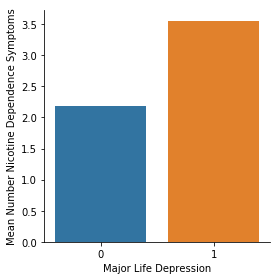

In [45]:

%matplotlib inline

# bivariate bar graph
facet_grid = seaborn.factorplot(x="MAJORDEPLIFE", y="NDSymptoms", data=sub1, kind="bar", ci=None)
text_tuple = facet_grid.set(xlabel='Major Life Depression',
                            ylabel='Mean Number Nicotine Dependence Symptoms')